In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import re

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_excel(r'C:\Users\Baqir\OneDrive\Desktop\resturant.xlsx')

In [6]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,2000.0,[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [7]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,2000.0,[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [9]:
data.duplicated().sum()

0

In [10]:
data.drop(['url','address','phone','reviews_list','menu_item','listed_in(city)'],inplace=True,axis=1)

In [11]:
after_dropping_duplicates = data.drop_duplicates()

In [12]:
after_dropping_duplicates

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


In [13]:
after_dropping_duplicates['name'][:20]

0                                                 Jalsa
1                                        Spice Elephant
2                                       San Churro Cafe
3                                 Addhuri Udupi Bhojana
4                                         Grand Village
5                                       Timepass Dinner
6       Rosewood International Hotel - Bar & Restaurant
7                                                Onesta
8                                        Penthouse Cafe
9                                             Smacznego
10    CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...
11                                         Cafe Shuffle
12                                     The Coffee Shack
13                                           Caf-Eleven
14                                      San Churro Cafe
15                                        Cafe Vivacity
16                                         Catch-up-ino
17                                     Kirthi's 

In [14]:
def clean_rest_name(name):
    if isinstance(name,str):
        if re.findall(r'[a-zA-Z0-9 ]',name):
            list_name = re.findall(r'[a-zA-Z0-9 ]',name) #list
        string_name = "".join(list_name)
        return string_name
    else:
        return name

In [15]:
after_dropping_duplicates['name'] = after_dropping_duplicates['name'].apply(clean_rest_name)

C:\Users\Baqir\AppData\Local\Temp\ipykernel_9528\2252155224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['name'] = after_dropping_duplicates['name'].apply(clean_rest_name)


In [16]:
after_dropping_duplicates['name'][1750:1800]

1751                          Arzak
1752       Furry Fairy Paw Paradise
1753                          Petoo
1754                    Night Panda
1755                    Spicy Grill
1756                E2  Entre Envoy
1757                  Aha Juice Bar
1758    Cafe Club Kerala Restaurant
1759                 Cake N Cookies
1760                 Bright Go Nuts
1761                Hotel Namadhari
1762             Nammuru Nati Hotel
1763                     3ice Cubes
1764               Tasty Restaurant
1765                   Hotel Ambara
1766                  Biryani Treat
1767                   Best Biryani
1768                         Innate
1769                  Tandoori Spot
1770                   Night Hunger
1771         Santhrupthi Halli Mane
1772                Iyengars Bakery
1773                      Nutri Fit
1774                New Kabab Plaza
1775               Padosi Apke Apne
1776                Grill On Wheels
1777                 Charcoal Flame
1778                   Chick

In [17]:
after_dropping_duplicates.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


In [18]:
after_dropping_duplicates['online_order'].value_counts()

online_order
Yes    20886
No     14223
Name: count, dtype: int64

**Around 20k resturant in banglore provides online orders**

**Around 14k resturant in banglore are not provides online orders**



In [19]:
after_dropping_duplicates['book_table'].value_counts()

book_table
No     29675
Yes     5434
Name: count, dtype: int64

**ound 20k resturant in banglore are not take advance booking**

**Around resurant in banglore are not provides**

In [20]:
after_dropping_duplicates['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
float('4.1/5'.split('/')[0])

4.1

In [22]:
def clean_rate(rates):
    if rates == "-" or rates == "NEW":
        return np.nan
    else:
        rates_converted = float(str(rates).split('/')[0])
        return rates_converted

In [23]:
after_dropping_duplicates['rate'] = after_dropping_duplicates['rate'].apply(clean_rate)

C:\Users\Baqir\AppData\Local\Temp\ipykernel_9528\1499334083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['rate'] = after_dropping_duplicates['rate'].apply(clean_rate)


In [24]:
after_dropping_duplicates['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 35109, dtype: float64

In [25]:
after_dropping_duplicates


,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews Four Points by Sheraton Bengaluru,No,No,3.6,27,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars
51714,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars
51715,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


In [26]:
after_dropping_duplicates['rate'].mean()

3.731078872769718

In [27]:
after_dropping_duplicates['rate'].fillna(after_dropping_duplicates['rate'].mean(),inplace=True)


C:\Users\Baqir\AppData\Local\Temp\ipykernel_9528\2288718154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['rate'].fillna(after_dropping_duplicates['rate'].mean(),inplace=True)


In [28]:
after_dropping_duplicates

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews Four Points by Sheraton Bengaluru,No,No,3.600000,27,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.731079,0,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars
51714,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,3.731079,0,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars
51715,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


In [29]:
after_dropping_duplicates['rate'] = round(after_dropping_duplicates['rate'],1)


C:\Users\Baqir\AppData\Local\Temp\ipykernel_9528\43864825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['rate'] = round(after_dropping_duplicates['rate'],1)


In [30]:
after_dropping_duplicates

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews Four Points by Sheraton Bengaluru,No,No,3.6,27,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars
51714,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,3.7,0,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars
51715,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


In [31]:
after_dropping_duplicates['votes'].value_counts()

votes
0       5099
4        764
6        632
7        551
9        469
        ... 
2569       1
575        1
7227       1
1290       1
843        1
Name: count, Length: 2328, dtype: int64

In [32]:
after_dropping_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35109 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         35109 non-null  float64
 4   votes                        35109 non-null  int64  
 5   location                     35095 non-null  object 
 6   rest_type                    34953 non-null  object 
 7   dish_liked                   18102 non-null  object 
 8   cuisines                     35076 non-null  object 
 9   approx_cost(for two people)  34888 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.2+ MB


In [33]:
after_dropping_duplicates['location'].value_counts()

location
BTM                     2520
Whitefield              1972
Indiranagar             1792
HSR                     1774
Marathahalli            1683
                        ... 
Central Bangalore          5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: count, Length: 93, dtype: int64

In [34]:
after_dropping_duplicates['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [35]:
after_dropping_duplicates['location'].fillna("No Info",inplace=True)

C:\Users\Baqir\AppData\Local\Temp\ipykernel_9528\1589691989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['location'].fillna("No Info",inplace=True)


In [36]:
after_dropping_duplicates['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'No Info', 'CV Raman Nagar', 'Electronic City',
       'HSR', 'Marathahalli', 'Sarjapur Road', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Koramangala 8th Block',
       'Richmond Road', 'Koramangala 7th Block', 'Jalahalli',
       'Koramangala 4th Block', 'Bellandur', 'Whitefield',
       'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipu

In [37]:
after_dropping_duplicates['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [38]:
after_dropping_duplicates['rest_type'].fillna("No Info",inplace=True)

C:\Users\Baqir\AppData\Local\Temp\ipykernel_9528\3689603234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['rest_type'].fillna("No Info",inplace=True)


In [39]:
after_dropping_duplicates['rest_type']

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51712                    Bar
51713                    Bar
51714                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 35109, dtype: object

In [40]:
after_dropping_duplicates['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [41]:
for item in after_dropping_duplicates['dish_liked'].unique():
    print(item)

Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup
Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani
Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza
Masala Dosa
Panipuri, Gol Gappe
Onion Rings, Pasta, Kadhai Paneer, Salads, Salad, Roti, Jeera Rice
nan
Farmhouse Pizza, Chocolate Banana, Virgin Mojito, Pasta, Paneer Tikka, Lime Soda, Prawn Pizza
Pizza, Mocktails, Coffee, Nachos, Salad, Pasta, Sandwiches
Waffles, Pasta, Coleslaw Sandwich, Choco Waffle, Tacos, Momos, Cheese Nachos
Waffles, Pasta, Crispy Chicken, Honey Chilli Chicken, Sandwich, Coffee, Crepe
Mocktails, Peri Fries, Lasagne, Pizza, Chicken Bbq Wings, Virgin Mojito, Nachos
Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sandwich, Garlic Bread
Sandwich, Omelette, Ice Tea, Virgin Mojito, Hot Chocolate, Pasta Arrabiata, Hazelnut Cappuccino
Garlic Bread, Burgers, Sandwiches, Pizza, Hot Chocolat

In [42]:
after_dropping_duplicates['dish_liked'].fillna("No Info",inplace=True)

C:\Users\Baqir\AppData\Local\Temp\ipykernel_9528\1795142276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['dish_liked'].fillna("No Info",inplace=True)


In [43]:
after_dropping_duplicates['dish_liked'].value_counts()

dish_liked
No Info                                                                                                          17007
Biryani                                                                                                            136
Chicken Biryani                                                                                                     51
Paratha                                                                                                             46
Friendly Staff                                                                                                      45
                                                                                                                 ...  
Chicken Curry, Biryani                                                                                               1
Beef Biryani, Paratha, Fish Curry, Chicken Biryani, Fish Fry                                                         1
Mojito, Pasta, Bbq Chicken Pizza, But

In [44]:
after_dropping_duplicates['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [45]:
for item in after_dropping_duplicates['cuisines'].unique():
    print(item)

North Indian, Mughlai, Chinese
Chinese, North Indian, Thai
Cafe, Mexican, Italian
South Indian, North Indian
North Indian, Rajasthani
North Indian
North Indian, South Indian, Andhra, Chinese
Pizza, Cafe, Italian
Cafe, Italian, Continental
Cafe, Mexican, Italian, Momos, Beverages
Cafe
Cafe, Chinese, Continental, Italian
Cafe, Continental
Cafe, Fast Food, Continental, Chinese, Momos
Chinese, Cafe, Italian
Cafe, Italian, American
Cafe, French, North Indian
Cafe, Pizza, Fast Food, Beverages
Cafe, Fast Food
Italian, Fast Food, Cafe, European
Cafe, Bakery
Cafe, South Indian
Cafe, Fast Food, Beverages
North Indian, Cafe, Chinese, Fast Food
Cafe, Italian
North Indian, Fast Food, Chinese, Burger
Bakery, Desserts
Pizza
North Indian, Biryani, Fast Food
Biryani
North Indian, Chinese, Fast Food
Chinese, Thai, Momos
North Indian, Mughlai, South Indian, Chinese
South Indian
Street Food, Fast Food
Burger, Fast Food
Pizza, Fast Food
North Indian, Continental, Italian
North Indian, Chinese
North Indian,

In [46]:
after_dropping_duplicates['cuisines'].fillna("No Info",inplace=True)

C:\Users\Baqir\AppData\Local\Temp\ipykernel_9528\2944456753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['cuisines'].fillna("No Info",inplace=True)


In [47]:
after_dropping_duplicates['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 35109, dtype: object

In [48]:
after_dropping_duplicates['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'No Info', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',


In [49]:
after_dropping_duplicates_group = after_dropping_duplicates.fillna(after_dropping_duplicates.groupby('rest_type')['approx_cost(for two people)'].transform("mean"))

In [50]:
after_dropping_duplicates_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35109 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         35109 non-null  float64
 4   votes                        35109 non-null  int64  
 5   location                     35109 non-null  object 
 6   rest_type                    35109 non-null  object 
 7   dish_liked                   35109 non-null  object 
 8   cuisines                     35109 non-null  object 
 9   approx_cost(for two people)  34888 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.2+ MB


In [51]:
after_dropping_duplicates

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews Four Points by Sheraton Bengaluru,No,No,3.6,27,Whitefield,Bar,No Info,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,Bar,No Info,Finger Food,600.0,Pubs and bars
51714,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,3.7,0,Whitefield,Bar,No Info,Finger Food,2000.0,Pubs and bars
51715,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


In [52]:
after_dropping_duplicates.groupby("name")[['votes']].mean().sort_values(by="votes",ascending=False)[:10]

,votes
name,
Byg Brewski Brewing Company,16588.500000
Toit,14956.000000
The Black Pearl,9562.333333
Big Pitcher,9164.500000
Arbor Brewing Company,8396.545455
Prost Brew Pub,7861.666667
Church Street Social,7561.727273
Hoot,7257.000000
Truffles,7139.952381


In [53]:
after_dropping_duplicates.groupby("name")[['rate']].mean().sort_values(by="rate",ascending=False)[:10]

,rate
name,
Byg Brewski Brewing Company,4.900000
Asia Kitchen By Mainland China,4.900000
Sant Spa Cuisine,4.900000
Punjab Grill,4.871429
Belgian Waffle Factory,4.852381
OG Variar Sons,4.800000
Flechazo,4.800000
The Pizza Bakery,4.800000
CTR,4.750000


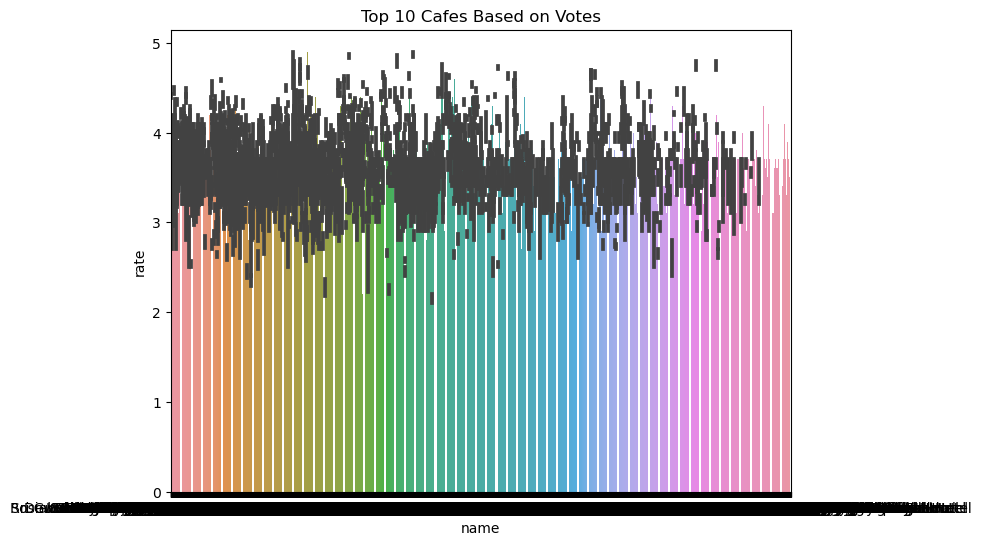

In [54]:
plt.figure(figsize=(8,6),edgecolor='black')
sns.barplot( x='name' , y='rate', data=after_dropping_duplicates)
plt.title('Top 10 Cafes Based on Votes')
plt.show()

In [55]:
after_dropping_duplicates.groupby("name")[['approx_cost(for two people)']].mean().sort_values(by="approx_cost(for two people)",ascending=False)[:10]

,approx_cost(for two people)
name,
Le Cirque Signature The Leela Palace,6000.0
Royal Afghan ITC Windsor,5000.0
Malties Radisson Blu,4500.0
La Brasserie Le Meridien,4100.0
Edo Restaurant Bar ITC Gardenia,4000.0
Dakshin ITC Windsor,4000.0
Grill 99 The RitzCarlton,4000.0
Riwaz The RitzCarlton,4000.0
Alba JW Marriott Bengaluru,4000.0


In [56]:
after_dropping_duplicates.groupby("name")[['approx_cost(for two people)']].mean().sort_values(by="approx_cost(for two people)",ascending=True)[:10]

,approx_cost(for two people)
name,
Srinidhi Sagar Deluxe,40.0
Bread Better,50.0
Funky Food,60.0
Nellore Dosa Camp,70.0
Namaste,70.0
Dtink Lab,80.0
Dosa Cafe,80.0
Shree Ganesh Fruit Juice Centre,90.0
Sri Sai Dosa Center,100.0


In [57]:
after_dropping_duplicates.groupby("listed_in(type)").count()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people)
listed_in(type),,,,,,,,,,
Buffet,676,676,676,676,676,676,676,676,676,671
Cafes,1252,1252,1252,1252,1252,1252,1252,1252,1252,1241
Delivery,16220,16220,16220,16220,16220,16220,16220,16220,16220,16129
Desserts,2478,2478,2478,2478,2478,2478,2478,2478,2478,2461
Dine-out,12965,12965,12965,12965,12965,12965,12965,12965,12965,12883
Drinks & nightlife,913,913,913,913,913,913,913,913,913,906
Pubs and bars,605,605,605,605,605,605,605,605,605,597


In [58]:
all_cafe_data = after_dropping_duplicates[after_dropping_duplicates['listed_in(type)'] == "Cafes"][:10]

In [59]:
all_cafe_data 

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,Cafes
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,Cafes
10,Caf Down The Alley,Yes,No,4.1,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.0,Cafes
11,Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600.0,Cafes
12,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500.0,Cafes
13,CafEleven,No,No,4.0,424,Banashankari,Cafe,"Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...","Cafe, Continental",450.0,Cafes
14,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Cafes
15,Cafe Vivacity,Yes,No,3.8,90,Banashankari,Cafe,"Garlic Bread, Burgers, Sandwiches, Pizza, Hot ...",Cafe,650.0,Cafes
16,Catchupino,Yes,No,3.9,133,Banashankari,Cafe,"Momos, Mushroom Bruschettas, Jalapeno Cheeseba...","Cafe, Fast Food, Continental, Chinese, Momos",800.0,Cafes


In [60]:
after_dropping_duplicates

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews Four Points by Sheraton Bengaluru,No,No,3.6,27,Whitefield,Bar,No Info,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,Bar,No Info,Finger Food,600.0,Pubs and bars
51714,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,3.7,0,Whitefield,Bar,No Info,Finger Food,2000.0,Pubs and bars
51715,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


In [61]:
#finding the frequency of 'online_order'
online_count = after_dropping_duplicates['online_order'].value_counts()
online_count

online_order
Yes    20886
No     14223
Name: count, dtype: int64

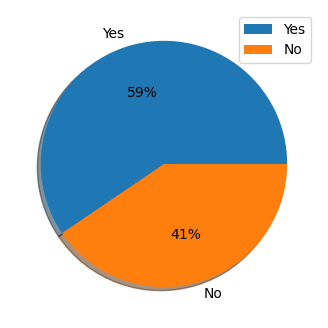

In [62]:
plt.figure(figsize=(4,4))
plt.pie(online_count,labels=online_count.index,autopct='%1.f%%',shadow=True)
plt.legend(['Yes','No'])
plt.show()

In [63]:
#finding the frequency of 'online_order'
table_count = after_dropping_duplicates['book_table'].value_counts()
table_count

book_table
No     29675
Yes     5434
Name: count, dtype: int64

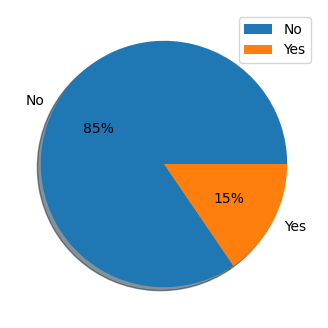

In [64]:
plt.figure(figsize=(4,4))
plt.pie(table_count,labels=table_count.index,autopct='%1.f%%',shadow=True)
plt.legend(['No','Yes'])
plt.show()

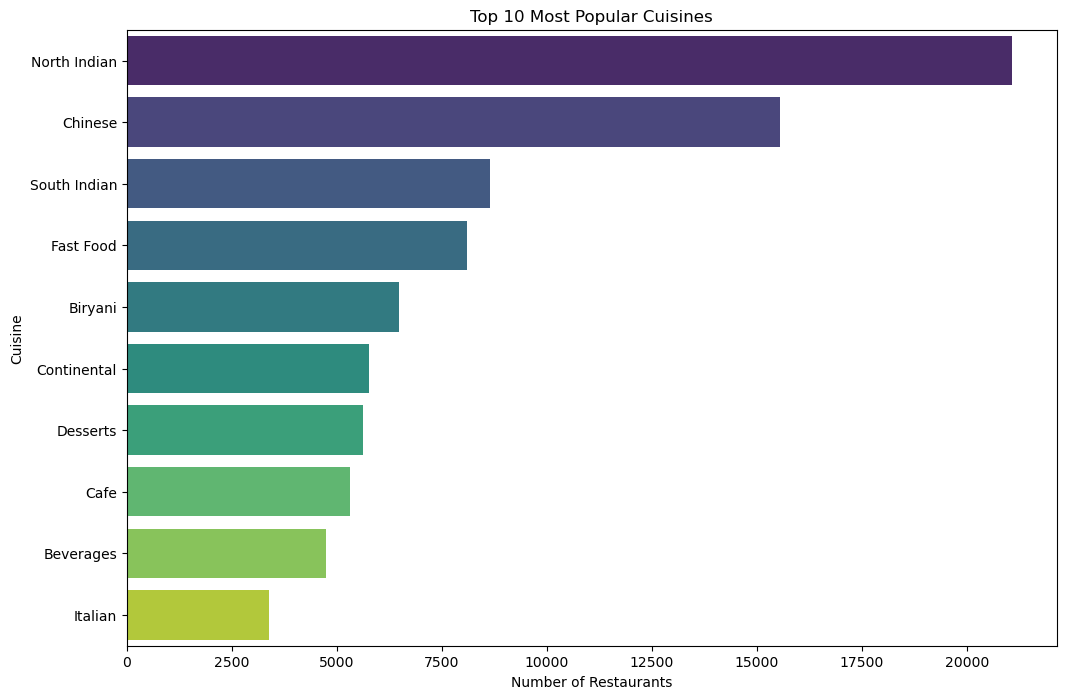

In [65]:
#Most popular cuisines
plt.figure(figsize=(12, 8))
cuisine_counts = data['cuisines'].str.split(', ', expand=True).stack().value_counts()
top_cuisines = cuisine_counts.head(10)  # Let's visualize the top 10 cuisines
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

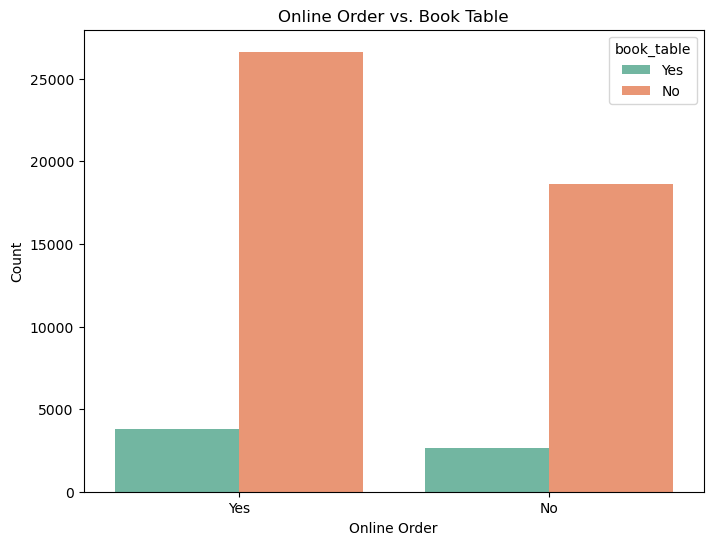

In [66]:
# Online order vs. Book table
plt.figure(figsize=(8, 6))
sns.countplot(x='online_order', hue='book_table', data=data, palette='Set2')
plt.title('Online Order vs. Book Table')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()

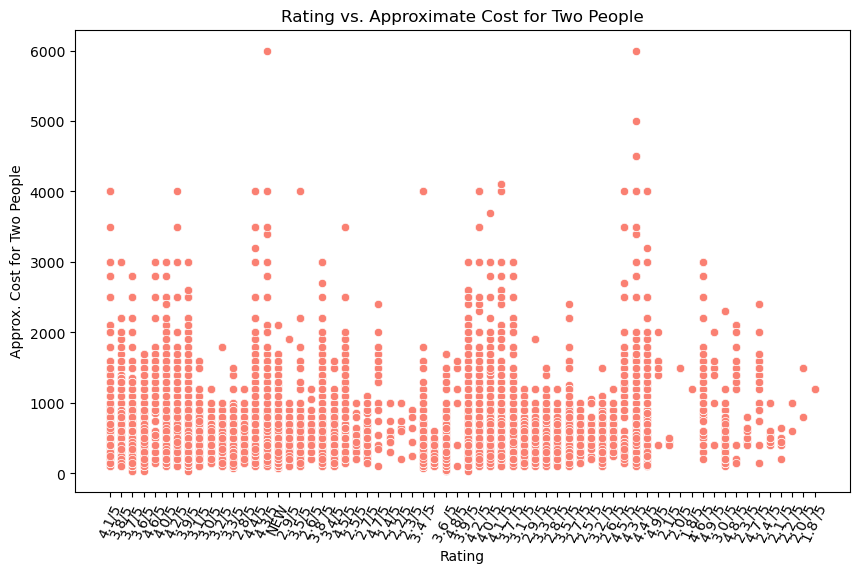

In [72]:
#Relationship between ratings and approximate cost for two people
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rate', y='approx_cost(for two people)', data=data, color='salmon')
plt.title('Rating vs. Approximate Cost for Two People')
plt.xlabel('Rating')
plt.ylabel('Approx. Cost for Two People')
plt.xticks(rotation=65) 
plt.show()

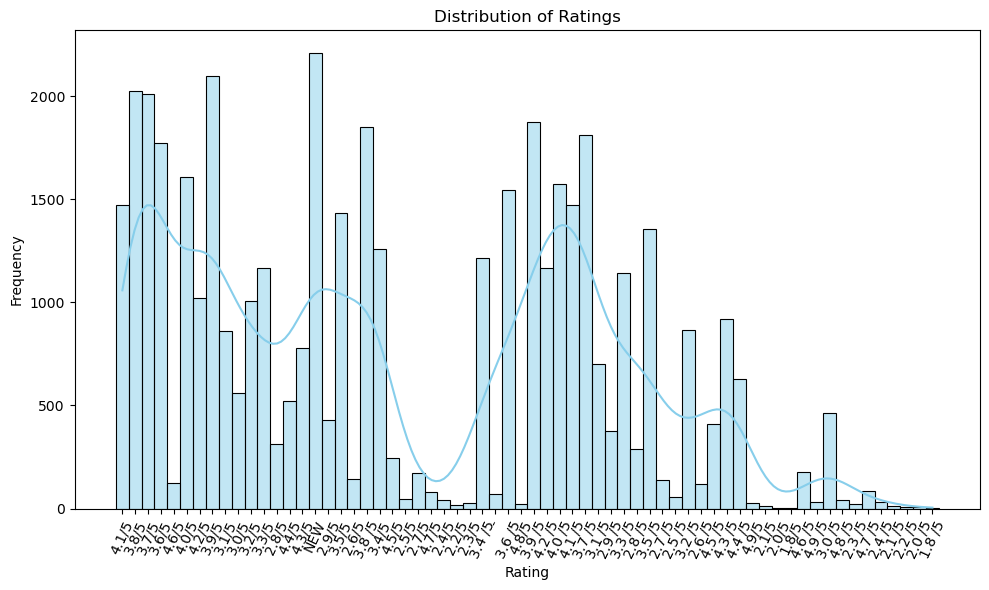

In [71]:
#Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rate'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=65)  
plt.tight_layout()  
plt.show()


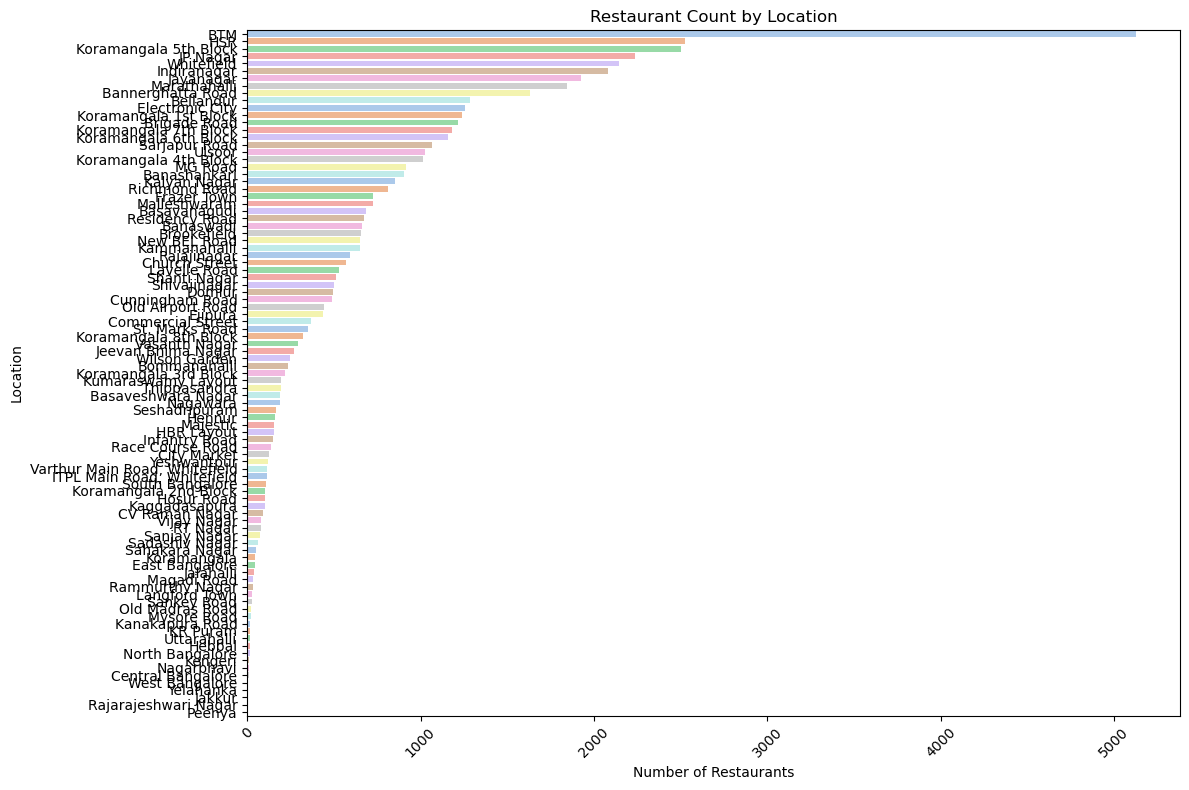

In [77]:
#Location-wise Restaurant Count
plt.figure(figsize=(12, 8))
sns.countplot(y='location', data=data, order=data['location'].value_counts().index, palette='pastel')
plt.title('Restaurant Count by Location')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()


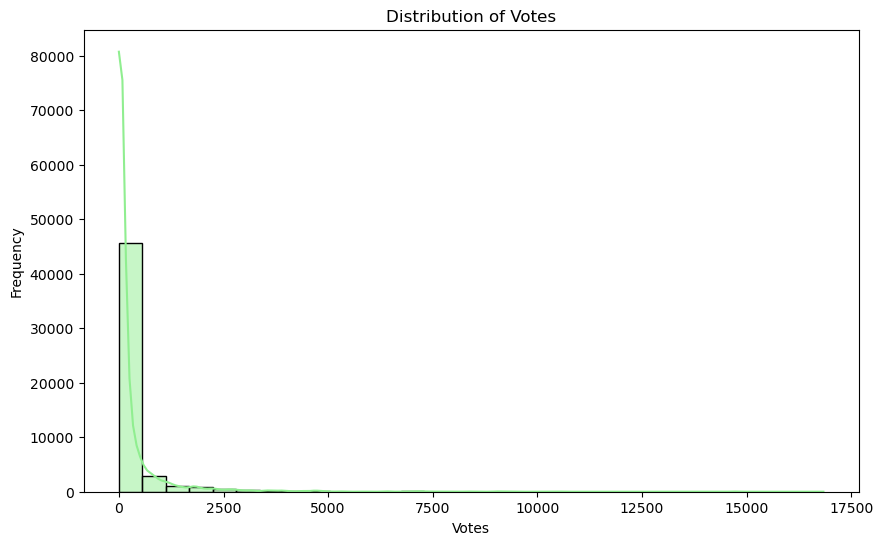

In [78]:
#Distribution of Votes
plt.figure(figsize=(10, 6))
sns.histplot(data['votes'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()


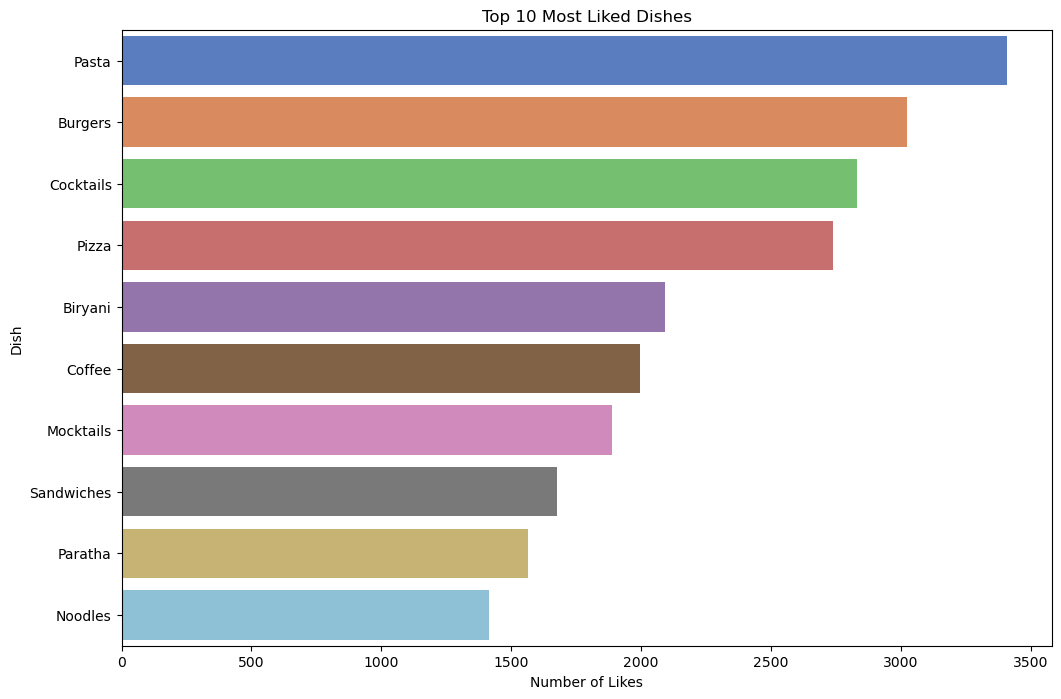

In [82]:
#Most Liked Dishes
plt.figure(figsize=(12, 8))
dish_likes = data['dish_liked'].str.split(', ', expand=True).stack().value_counts()
top_dishes = dish_likes.head(10)
sns.barplot(x=top_dishes.values, y=top_dishes.index, palette='muted')
plt.title('Top 10 Most Liked Dishes')
plt.xlabel('Number of Likes')
plt.ylabel('Dish')
plt.show()


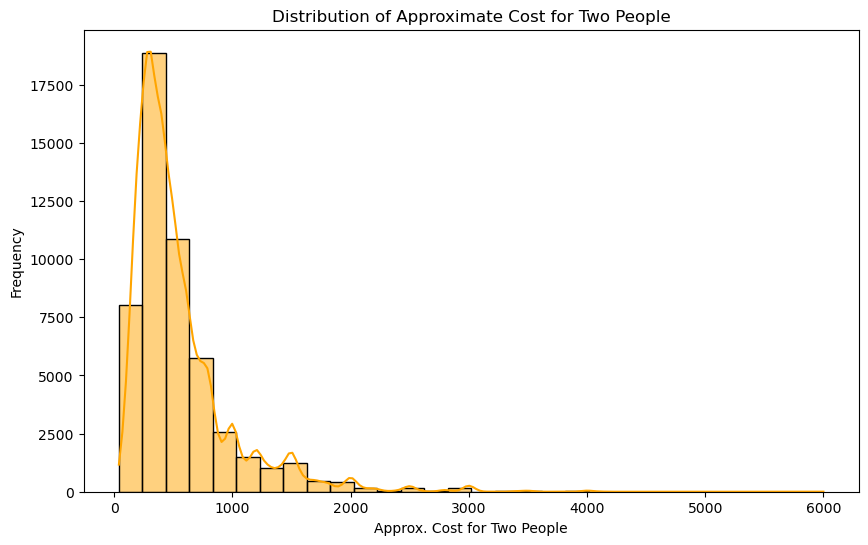

In [86]:
#Distribution of Approximate Cost for Two People
plt.figure(figsize=(10, 6))
sns.histplot(data['approx_cost(for two people)'], bins=30, kde=True, color='orange')
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Approx. Cost for Two People')
plt.ylabel('Frequency')
plt.show()


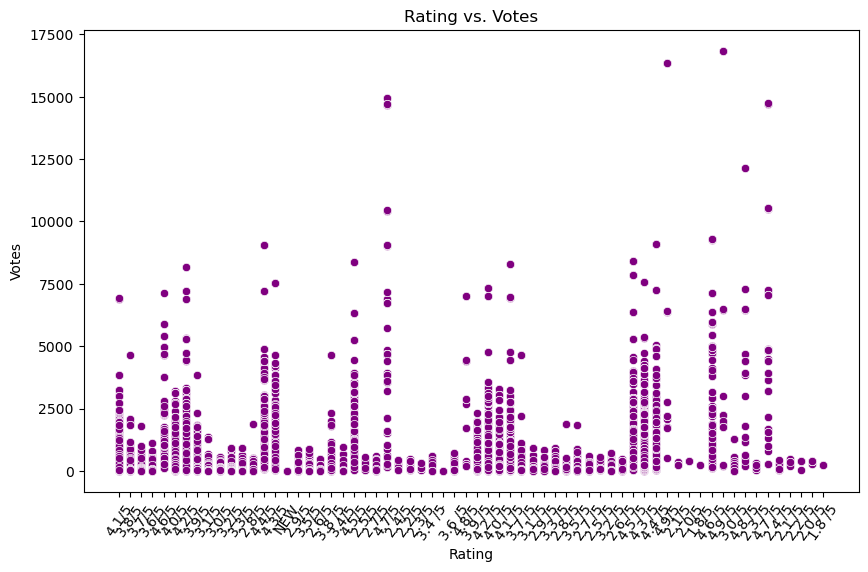

In [89]:
#Rate vs. Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rate', y='votes', data=data, color='purple')
plt.title('Rating vs. Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.xticks(rotation=55)
plt.show()


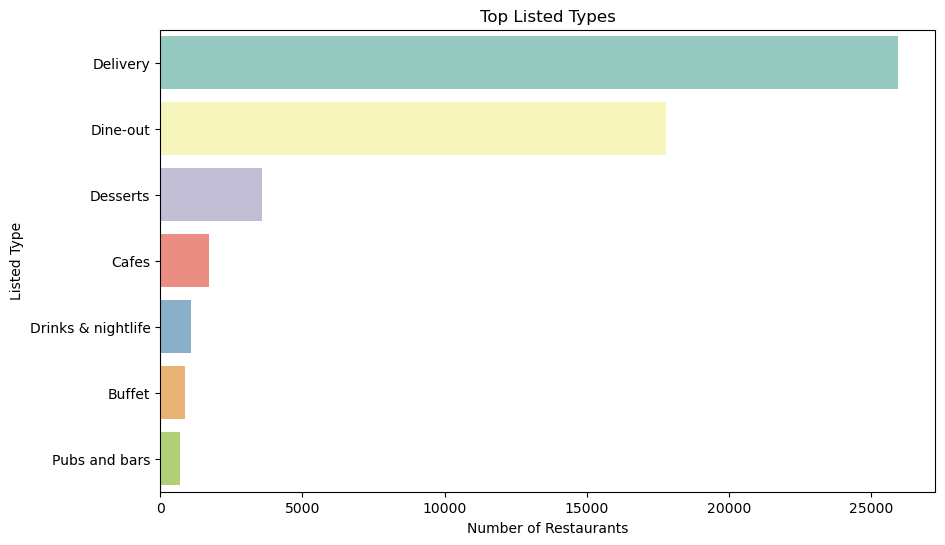

In [90]:
#Top Listed Types
plt.figure(figsize=(10, 6))
sns.countplot(y='listed_in(type)', data=data, order=data['listed_in(type)'].value_counts().index, palette='Set3')
plt.title('Top Listed Types')
plt.xlabel('Number of Restaurants')
plt.ylabel('Listed Type')
plt.show()


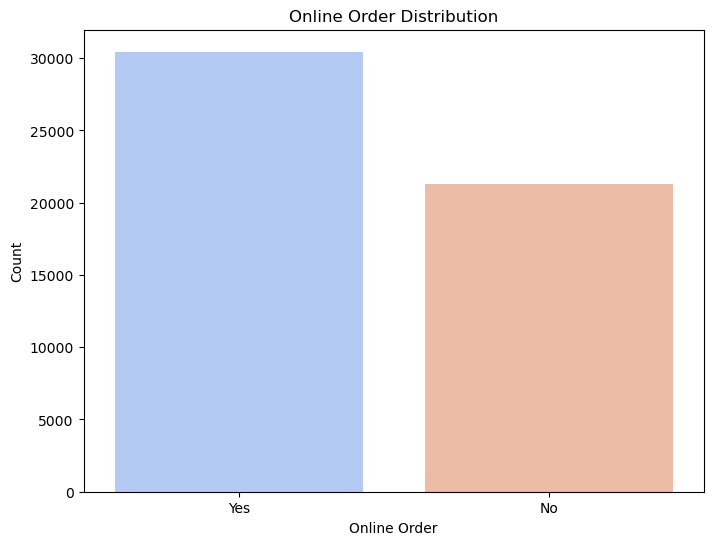

In [91]:
#Online Order Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='online_order', data=data, palette='coolwarm')
plt.title('Online Order Distribution')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()


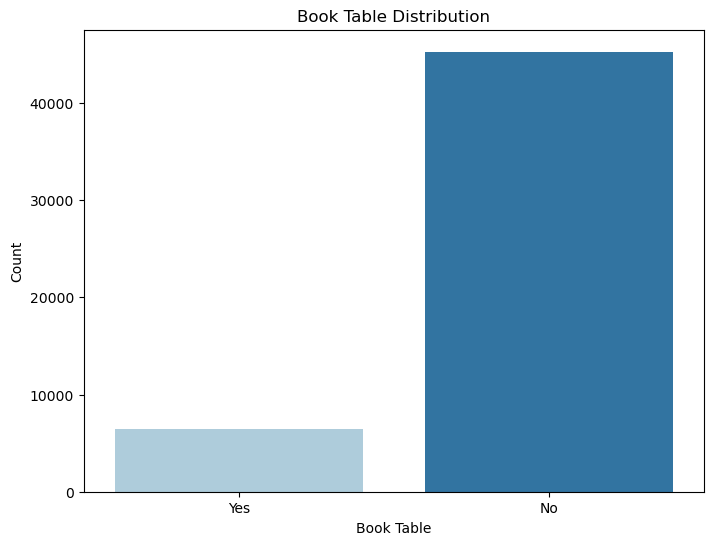

In [92]:
#Book Table Distribution\
plt.figure(figsize=(8, 6))
sns.countplot(x='book_table', data=data, palette='Paired')
plt.title('Book Table Distribution')
plt.xlabel('Book Table')
plt.ylabel('Count')
plt.show()


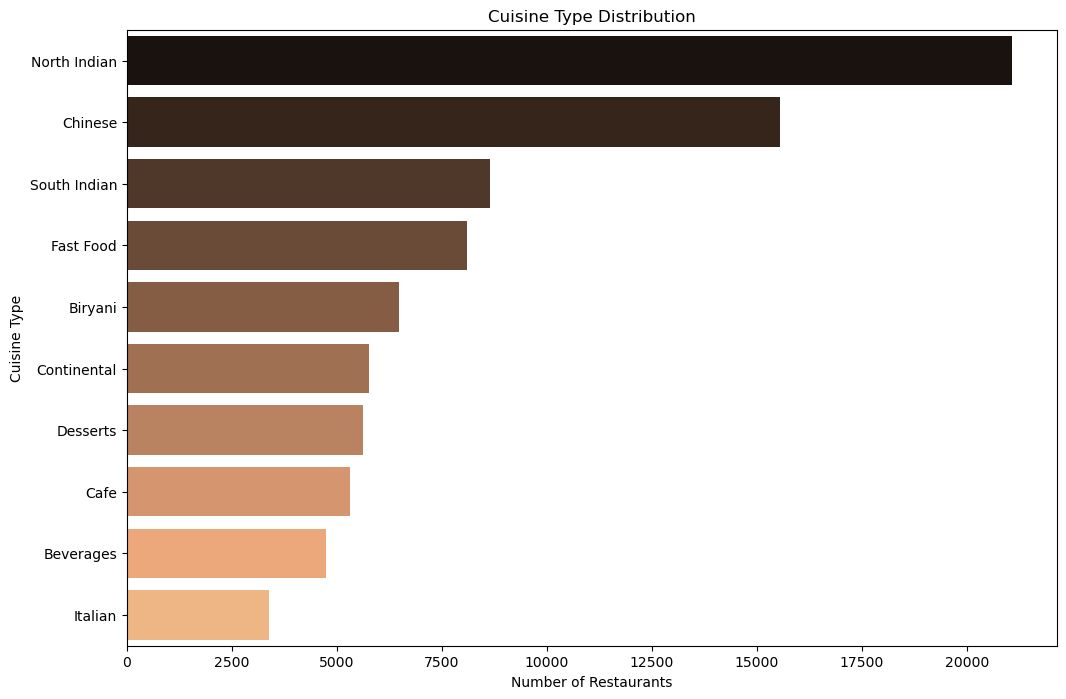

In [93]:
#Cuisine Type Distribution
plt.figure(figsize=(12, 8))
cuisine_counts = data['cuisines'].str.split(', ', expand=True).stack().value_counts()
top_cuisines = cuisine_counts.head(10)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='copper')
plt.title('Cuisine Type Distribution')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.show()
